In [1]:
import wobble
import numpy as np
import matplotlib.pyplot as plt

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
o = 56
data = wobble.Data('51peg_e2ds.hdf5', filepath='data/', orders=[o])
results = wobble.Results(data)

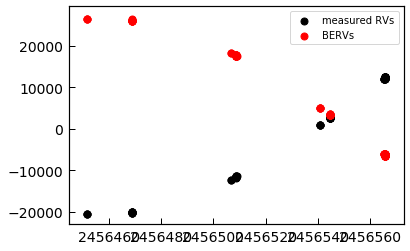

In [3]:
plt.scatter(data.dates, data.pipeline_rvs, c='k', label='measured RVs')
plt.scatter(data.dates, data.bervs, c='r', label='BERVs')
plt.legend();

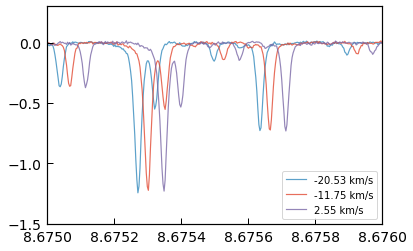

In [4]:
for e in [0,15,40]:
    plt.plot(data.xs[0][e], data.ys[0][e], alpha=0.8, 
             label='{0:.2f} km/s'.format(data.pipeline_rvs[e]*1.e-3))

plt.xlim([8.675,8.676])
plt.ylim([-1.5,0.3])
plt.legend();

#### If velocities follow convention, larger velocity should have the lines shifted right (redshifted).

In [5]:
shifted_xs = data.xs[0] + np.log(wobble.doppler(data.pipeline_rvs[:, None], tensors=False))

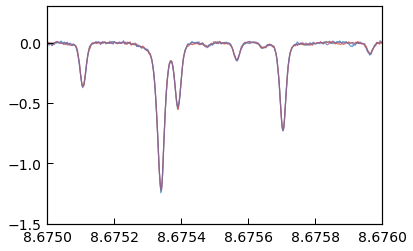

In [7]:
for e in [0,15,40]:
    plt.plot(shifted_xs[e], data.ys[0][e], alpha=0.8, 
             label='{0:.2f} km/s'.format(data.pipeline_rvs[e]*1.e-3))

plt.xlim([8.675,8.676])
plt.ylim([-1.5,0.3]);

#### If Doppler shift code is working, all the spectra should have lines in the same places now.

In [31]:
results = wobble.Results(data)
model = wobble.Model(data, results, 0)
starting_rvs = np.copy(data.bervs) - np.mean(data.bervs)
starting_rvs *= -1.
model.add_star('star', starting_rvs=starting_rvs)
wobble.optimize_order(model, niter=0)

0it [00:00, ?it/s]


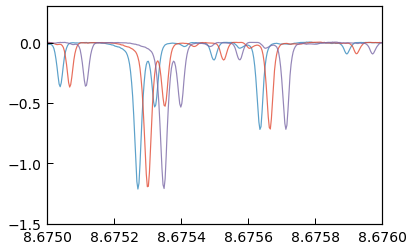

In [32]:
for e in [0,15,40]:
    plt.plot(data.xs[0][e], results.star_ys_predicted[0][e], alpha=0.8, 
             label='{0:.2f} km/s'.format(data.pipeline_rvs[e]*1.e-3))

plt.xlim([8.675,8.676])
plt.ylim([-1.5,0.3]);

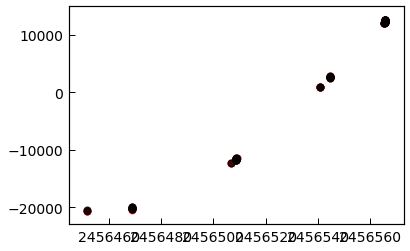

In [33]:
plt.scatter(data.dates, results.star_rvs[0], c='r', alpha=0.6)
plt.scatter(data.dates, data.pipeline_rvs, c='k', alpha=0.5);

16.534763163655107

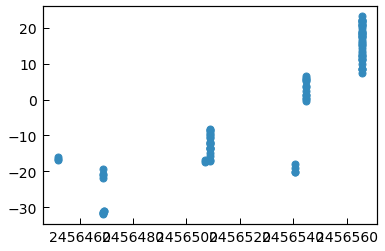

In [34]:
plt.scatter(data.dates, results.star_rvs[0] - data.pipeline_rvs)
np.std(results.star_rvs[0] - data.pipeline_rvs)

In [35]:
wobble.optimize_order(model, niter=200)

100%|██████████| 200/200 [00:08<00:00, 24.09it/s]


11.651566409816501

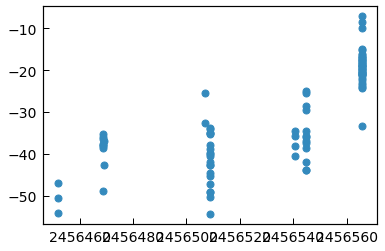

In [36]:
plt.scatter(data.dates, results.star_rvs[0] - data.pipeline_rvs)
np.std(results.star_rvs[0] - data.pipeline_rvs)

In [38]:
pipeline = data.pipeline_rvs + data.bervs - np.mean(data.pipeline_rvs + data.bervs)
us = results.star_rvs[0] + data.bervs - np.mean(results.star_rvs[0] + data.bervs)

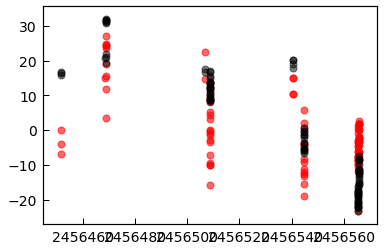

In [39]:
plt.scatter(data.dates, us, c='r', alpha=0.6)
plt.scatter(data.dates, pipeline, c='k', alpha=0.5);